In [2]:
import pandas as pd

df = pd.read_csv("../data/news.csv")
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
# count headline lengths
df['headline_lenght']=df['headline'].astype(str).apply(len)
df['headline_lenght'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_lenght, dtype: float64

In [7]:
df['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

<Axes: xlabel='date'>

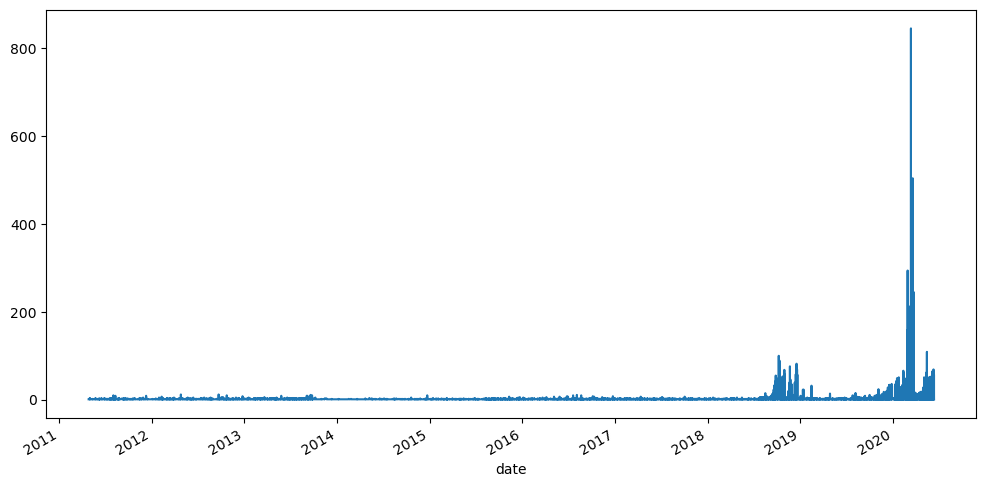

In [6]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['date'].value_counts().sort_index().plot(figsize=(12,6))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
word_matrix = cv.fit_transform(df['headline'].astype(str))
cv.get_feature_names_out()


array(['announces', 'benzinga', 'buy', 'downgrades', 'earnings', 'eps',
       'est', 'market', 'mid', 'price', 'pt', 'raises', 'reports',
       'sales', 'shares', 'stocks', 'trading', 'update', 'vs', 'week'],
      dtype=object)

<Axes: xlabel='date'>

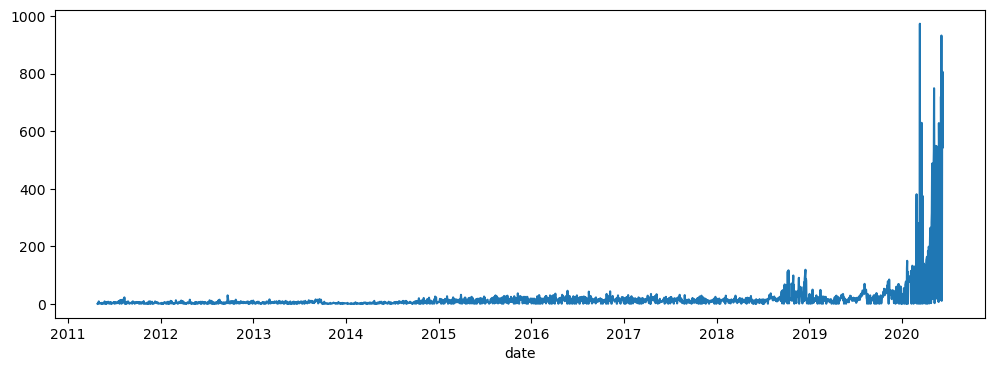

In [9]:
df.groupby(df['date'].dt.date).size().plot(figsize=(12,4))


In [ ]:
df['domain'] = df['publisher'].str.extract(r'@(.+)')
df['domain'].value_counts()
